# Hashin's Variational Model 

Notebook made by Kristine M. Jespersen

-------------Below is still draft!-----------------

This notebook focuses on how to apply Hashin's model to estimate a stiffness reduction caused by the initiation of transverse cracks in the 90$^{\circ}$ layers of a cross-ply composite. Focus is not put on explaining the details of the model deriviation, but more on how to use it. For a more detailed description of the method, please see the original paper by Hashin:

**Z. Hashin, Analysis of cracked laminates: a variational approach, Mechanics of materials 4 (1985) 121-136**

and a later paper by Nairn that expands Hashin's model but also explains it in a different way.

**XX Nairn**

## 1. Relevant equations

The same cross-ply composite as Hashin considered is used for validation purposes. The layup is $[0,90_3]_s$ and cracks are assumed only to appear in the $90^\circ$ layer. The stresses in the 90$^\circ$ layer (ply 1, $\sigma_1$) and the 0$^\circ$ layer (ply 2, $\sigma_2$) can be estimated as below as also explained by Nairn:

\begin{equation}
    \sigma_1=\dfrac{E_T}{E_0}\sigma_0 \quad and \quad \sigma_2=\dfrac{E_A}{E_0}\sigma_0
\end{equation}

Where $E_0$ is the composite modulus. $E_T$ and $E_A$ is the transverse and axial stiffness modulus of the lamina, respectively. By simple rule of mixtures (ROM) considerations, the composite modulus can be estimated by:

\begin{equation}
    E_0=\dfrac{t2}{h}E_a+\dfrac{t1}{h}E_t
\end{equation}

\noindent where t1 and t2 are the thicknesses of the of the 90deg and 9deg layers, respectively, as defined in Fig. XX. The stress ratio for the 90$^\circ$ as defined by Hashin can then be written as:

\begin{equation}
    k_1=\dfrac{\sigma_1}{\sigma_0}= \dfrac{\dfrac{E_T}{E_0}\sigma_0}{\sigma_0}=\dfrac{E_T}{E_0}
\end{equation}

Hashin derived an expression for the limiting value (lower bound, crack saturation) for the stiffness degradation as:

\begin{equation}
    \dfrac{1}{E_x} \leq \dfrac{1}{E_x^0}+\dfrac{k_1^2}{\lambda+1}\left( \dfrac{1}{E_T}+\dfrac{1}{\lambda E_A}\right)
\end{equation}

where $\lambda=\dfrac{t_2}{t_1}$. Furthermore, if assuming that the distance between all the cracks is the same and that the cracks are far enough apart not to interact, Hashin provided the following expression:

\begin{equation}
    \dfrac{1}{E_x} \leq \dfrac{1}{E_x^0}+\dfrac{4}{E_T}k_1^2 \eta(\lambda)\alpha (\alpha^2+\beta^2)t_1 c
\end{equation}

where $c=1/2a=1/2\rho t_1$ is the crack density, and $\eta(\lambda)$ is given by:

\begin{equation}
    \eta(\lambda)=(3\lambda^2+12\lambda+8)/60
\end{equation}

For some reason, however, it was not possible for me to get the correct results using the first expression (Eq. XX in Hashin 1985). Therefore, an equivalent expression was derived from the expression in Eq. XX using the exact same assumptions as was done for Eq. XX.

\begin{equation}
    \dfrac{1}{E_x}\leq \dfrac{1}{E_x^0}+
    \underbrace{\dfrac{1}{E_t}k_1^2 \eta(\lambda)\dfrac{\langle\chi (\rho)\rangle}{\langle\rho\rangle}}_{\textrm{compliance change due to cracks}}
\end{equation}


If assuming the cracks to have the same spacing and that they don't interact, the following applies:

\begin{equation*}
    \begin{split}
    \rho&=\dfrac{a}{t_1}\\
    \langle\chi (\rho)\rangle &=\chi(\rho)\\
    \langle\rho\rangle&=\rho
    \end{split}
\end{equation*}

Here $\chi (\rho)$ is given by:

\begin{equation*}
    \chi (\rho)=2\alpha\beta \left(\alpha^2+\beta^2\right) \dfrac{\cosh(2\alpha\rho)-\cos(2\beta\rho)}{\alpha\sin(2\beta\rho)+\beta\sinh(2\alpha\rho)}
\end{equation*}

where $\alpha$ and $\beta$ are found by minimizing the complimentary energy using the Euler-Lagrange formulation \kmunc{I did not look into the derivation of this so much}. They are given by:

\begin{equation*}
    \begin{split}
    \alpha&=\dfrac{q}{1/4}\cos\left(\dfrac{\theta}{2}\right)\\
    \beta&=\dfrac{q}{1/4}\sin \left(\dfrac{\theta}{2}\right)\\
    \theta&=\arctan\left( \sqrt{4q/p^2-1} \right)
    \end{split}
\end{equation*}

with

\begin{equation*}
    \begin{split}
    p &=\left(C_{02}-C_{11}\right)/C_{22}\\
    q &=C_{00}/C_{22}
    \end{split}
\end{equation*}

where $C_{00}$, $C_{02}$, $C_{22}$, and $C_{11}$ are constants in the expression for the complementary energy change caused by the presence of cracks. They are given by:

\begin{equation*}
    \begin{split}
        C_{00}&=\dfrac{1}{E_T}+\dfrac{1}{\lambda E_A}\\
        C_{02}&=\left(\dfrac{\nu_T}{E_T}\right)\left(\lambda+\dfrac{2}{3}\right)-\left( \dfrac{\nu_A\lambda}{3 E_A}\right)\\
        C_{22}&= \dfrac{(\lambda+1)(3\lambda^2+12\lambda+8)}{60 E_T}\\
        C_{11}&= \dfrac{1}{3}\left(\dfrac{1}{G_T}+\dfrac{\lambda}{G_A}\right)\\
        \lambda&=\dfrac{t_2}{t_1}
    \end{split}
\end{equation*}

From this, the stiffness degradation can be calculated with only $E_t$, $G_t$, $\nu_t$, $E_a$, $G_a$, $\nu_a$, $t_1$, and $t_2$ as input. This is simply done by calculating the constants $C_{00}$, $C_{02}$, $C_{22}$, and $C_{11}$, and insert them into the expressions for $p$ and $q$. From this, $\alpha$ and $\beta$ can then be determined and used to determine $\chi$ followed by $E_x$.

## 2. Implementing the model using python
First, we import the relevant packages:

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline 

For easy repeated use of the model we wish to implement, it is useful to create it as a function. When doing so, it is necessary to first think about which input and output parameters we wish the function to have. In the case of Hashin's model, the main input parameters will be the material properties: $E_a$, $E_t$, $G_t$, $\nu_a$ and $\nu_t$ and the layer thicknesses $t_1$ and $t_2$. Additional parameters can be added to one's liking, and in this case we choose to also add a maximum value for the crack density, c, and a toggle for normalisation of the stiffness. 

This leads to the following function definition, where cMax and normToggle are optional input parameters with a default value of 1.

In [5]:
def hashin1985(Ea, Et, Ga, Gt, va, vt, t1, t2, cMax=1, normToggle=1):
    """
    This code was written by Kristine Munk Jespersen (kmun@dtu.dk)
    
    Parameters
    ----------
    Ea : float
        Young's modulus in fibre direction (load dir, 0 deg ply)
    Et : float
        Young's modulus in transverse direction (load dir, 90 deg ply)
    Ga : float
        Axial shear modulus (load dir, 0 deg ply)
    Gt : float
        Transverse shear modulus (load dir, 90 deg ply)
    va : float
        associated axial Poisson's ratio (load dir, 0 deg ply)
    vt : float
        associated transverse Poisson's ratio (load dir, 90 deg ply)
    t1 : float
        thickness of 90 deg layer(s).
    t2 : float
        thickness of 0 deg layer (s).
    cMax : float (default value = 1)
        Max value for the crack density 
    normToggle : int (default value = 1)
        Output normalized stiffness (=1), or absoulute stiffness (=0)
    Returns
    -------
    Ex : ndarray, shape (N)
        Stiffness degradation as a function of crack density array
    c : ndarray, shape (N)
        Crack density array following the Ex array.
    ExMin : float
        Stiffness at crack saturation (lower bound value)
    
    References
    ----------
    .. [1] Z. Hashin, Analysis of cracked laminates: a variational approach,
           Mechanics of materials 4 (1985) 121-136   
    """
    
    #Other parameters (Not to be modified)
    h=t1+t2
    lambda1=t2/t1
    E_0=t2/h*Ea+t1/h*Et
    print('t2='+str(t2)+', t1='+str(t1)+', h='+str(h)+', Ea='+str(E_a)+', Et='+str(E_t)+'--> E0='+str(E_0))  
    k1=Et/E_0    # I am not 100% sure about the determination of k1.. Check up!
    c=np.linspace(0,cMax,100)    
    
    # Constants and other parameters from Hashin
    C00=1/Et+1/(lambda1*Ea)
    C02=(vt/Et)*(lambda1+2./3.)-(va*lambda1/(3.*Ea))
    C22=(lambda1+1)*(3*lambda1**2.+12.*lambda1+8.)/(60.*Et)
    C11=1./3.*(1/Gt+lambda1/Ga)
    q=C00/C22
    p=(C02-C11)/C22
    theta = m.atan(np.sqrt(4*q/(p**2.)-1.))
    alpha=q**(1./4.)*np.cos(1/2.*theta);
    beta=q**(1./4.)*np.sin(1/2.*theta);
        
    # Limiting value for the stiffness degradation (Hashin)
    C_lim=1./E_0+k1**2./(lambda1+1.)*(1/Et+1./(lambda1*Ea))
    Elim=1./C_lim
    
    # Stiffness as function of the crack density assuming equal space between cracks and no interaction 
    rho=1/(2*c*t1)
    eta = (3.*lambda1**2.+12.*lambda1+8.)/60.
    chi=2*alpha*beta*(alpha**2+beta**2)*(np.cosh(2.*alpha*rho)-np.cos(2*beta*rho))/(alpha*np.sin(2*beta*rho)+beta*np.sinh(2*alpha*rho))
    chi[np.isnan(chi)] = 0
    compl=1/E_0+1/Et*k1**2*eta*chi/rho
    Ex=1/compl
       
    # Return the output parameters. If normalise toggle is on, then normalise the stiffness before returning
    if normToggle==1:
        return Ex/E_0, c, Elim/E_0
    else:
        return Ex, c, Elim

Now let's try to use the function using the same parameters as in Hashin 1985 (note that the warnings below are caused for a crack density of zero and can be ignored):

In [3]:
t2=0.203
t1=3*t2
E_a=41.7
nu_a=0.30
E_t=13.
nu_t=0.42
G_a=3.4
G_t=4.580
cMax=1     

ExNorm,c,ElimNorm = hashin1985(E_a, E_t, G_a, G_t, nu_a, nu_t, t1, t2, cMax)

t2=0.203, t1=0.609, h=0.812, Ea=41.7, Et=13.0--> E0=20.174999999999997


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in cos
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in sin


And plot the results:

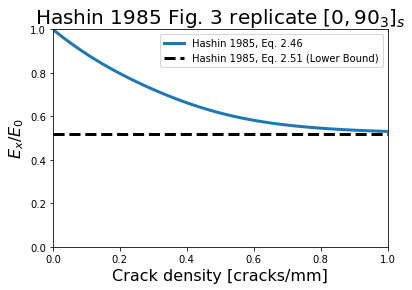

In [4]:
# Plot figure
plt.figure()
ax=plt.gca()
plt.plot(c,ExNorm,linewidth=3,label='Hashin 1985, Eq. 2.46')
plt.ylabel('$E_x$/$E_0$', fontsize=16)
plt.xlabel('Crack density [cracks/mm]', fontsize=16)
plt.title('Hashin 1985 Fig. 3 replicate $[0,90_3]_s$', fontsize=20)
ax.set_ylim([0,1])
ax.set_xlim([0,cMax])
plt.plot((0, cMax), (ElimNorm, ElimNorm), 'k--',linewidth=3,label='Hashin 1985, Eq. 2.51 (Lower Bound)')
plt.legend(numpoints=1)